<a href="https://colab.research.google.com/github/Zhaoxin-Hu/ECE222A/blob/master/Homework%203.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 3

In [0]:
import matplotlib
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as axes3d
np.set_printoptions(suppress=True)

Define unnormalized and normalized pattern function <br/>
- unnormalized: $P_{un}(\theta,\phi) = \sum_nI_ne^{jn\psi}$ <br/>
- normalized: $P_n(\theta,\phi) = \frac{P_{un}}{P_{un,max}}$

In [0]:
num_pts_theta = 1000
num_pts_phi = 100
theta, phi = np.linspace(-np.pi, np.pi, num_pts_theta), np.linspace(0, 2*np.pi, num_pts_phi)
theta2d, phi2d = np.meshgrid(theta, phi)
theta2d, phi2d = np.transpose(theta2d), np.transpose(phi2d)
Nz = 16
k = 2*np.pi
dz = 0.5
az = 0

In [0]:
# unnormalized array factor for array on z-axis
def AFz_un(theta, phi):
    AF = 0
    psi = k*dz*np.cos(theta)+az
    for n in np.arange(Nz):
        AF = AF + np.exp(1j*n*psi)
    return np.abs(AF)

# unnormalized pattern for array on z-axis
def Pz_un(theta, phi):
    AF = AFz_un(theta, phi)
    EF = np.sin(theta)  
    return np.abs(AF*EF)

Compute 2d array factor and pattern

In [0]:
AFz_un_max = max(AFz_un(theta, 0))
AFz_n = AFz_un(theta,phi)/AFz_un_max
AFz_dB = 20*np.log10(AFz_n)

Pz_un_max = max(Pz_un(theta, 0))
Pz_n = Pz_un(theta,phi)/Pz_un_max
Pz_dB = 20*np.log10(Pz_n)

2d plotting

Text(0.5,0,'$\\theta$')

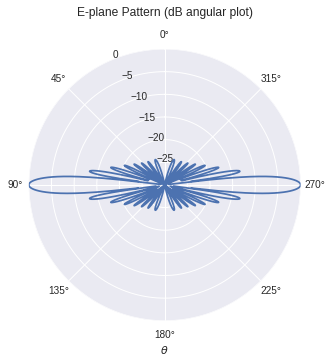

In [0]:
# plot pattern
plt.figure(figsize = (5,5))
ax = plt.subplot(111, projection='polar')
ax.set_theta_offset(np.pi/2)
ax.plot(theta, AFz_dB)
ax.set_rmax(0)
ax.set_rmin(-30)
ax.set_title(r'E-plane Pattern (dB angular plot)', y=1.1)
ax.set_xlabel(r'$\theta$')

Compute 3d array factor and pattern

In [0]:
AFz_un_3d = AFz_un(theta2d,phi2d)
AFz_un_3d_max = np.max(np.max(AFz_un_3d))
AFz_n_3d = AFz_un_3d/AFz_un_3d_max
AFz_dB_3d = 20*np.log10(AFz_n_3d)
AFz_dB_2d = AFz_dB_3d[:,0]

In [86]:
offset = 30
R = AFz_dB_2d+offset
R[R<0] = 0;
X = R * np.sin(theta2d[:,0]) * np.cos(phi2d[:,0])
Y = R * np.sin(theta2d[:,0]) * np.sin(phi2d[:,0])
Z = R * np.cos(theta2d[:,0])
'''X = R * np.sin(theta2d) * np.cos(phi2d)
Y = R * np.sin(theta2d) * np.sin(phi2d)
Z = R * np.cos(theta2d)'''
X = np.reshape(X,(num_pts_theta,1))
Y = np.reshape(Y,(num_pts_theta,1))
Z = np.reshape(Z,(num_pts_theta,1))
print(X.shape)
print(Y.shape)
print(Z.shape)

(1000, 1)
(1000, 1)
(1000, 1)


Text(0.5,0,'$\\theta$')

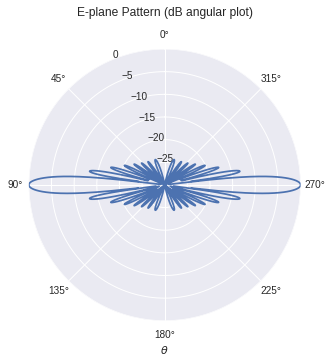

In [72]:
# plot pattern
plt.figure(figsize = (5,5))
ax = plt.subplot(111, projection='polar')
ax.set_theta_offset(np.pi/2)
ax.plot(theta2d[:,0], AFz_dB_2d)
ax.set_rmax(0)
ax.set_rmin(-30)
ax.set_title(r'E-plane Pattern (dB angular plot)', y=1.1)
ax.set_xlabel(r'$\theta$')

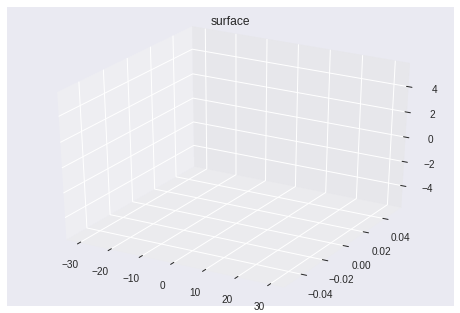

In [89]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, edgecolor='k', cmap = 'jet')
ax.set_title('surface')
plt.show()

3d plotting

In [0]:
R = AFz_dB_3d
X = R * np.sin(theta2d) * np.cos(phi2d)
Y = R * np.sin(theta2d) * np.sin(phi2d)
Z = R * np.cos(theta2d)

# fourth dimention - colormap
# create colormap according to R-value
'''color_dimension = R # change to desired fourth dimension
minn, maxx = color_dimension.min(), color_dimension.max()
norm = matplotlib.colors.Normalize(minn, maxx)
m = plt.cm.ScalarMappable(norm=norm, cmap='jet')
m.set_array([])
fcolors = m.to_rgba(color_dimension)'''

'''fig = plt.figure()
ax = fig.gca(projection='3d')
pattern = ax.plot_surface(
    X, Y, Z, rstride=1, cstride=1, facecolors=fcolors, vmin=minn, vmax=maxx,
    shade=False, alpha=0.5, linewidth=0, antialiased=False)
fig.colorbar(pattern, shrink=0.5, aspect=5)
plt.show()'''
# cmap=plt.get_cmap('jet')

fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
plot = ax.plot_surface(
    X, Y, Z, rstride=1, cstride=1,
    linewidth=0, antialiased=False, alpha=0.5)
plt.show()

'''
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X,Y,Z, rstride=1, cstride=1, facecolors=fcolors, vmin=minn, vmax=maxx, shade=False)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
fig.canvas.show()
'''

KeyboardInterrupt: ignored

/srv/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


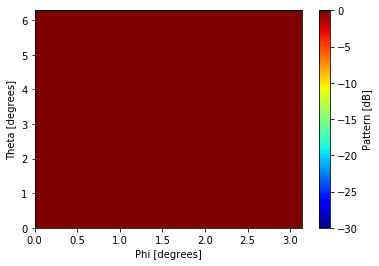

In [0]:
## Plot in 2D ##

theta, phi = np.linspace(0, 2 * np.pi, 40), np.linspace(0, np.pi, 40)
theta2d, phi2d = np.meshgrid(theta, phi)

# Control plot dynamic range
pltmax = 0
pltmin = -30

# Create the 2D colormap
plt.figure()
plt.pcolor(phi2d, theta2d, np.nan_to_num(P_n(theta2d, phi2d)), vmin=pltmin, vmax=pltmax, cmap="jet")
plt.xlabel("Phi [degrees]")
plt.ylabel("Theta [degrees]")
plt.colorbar(label="Pattern [dB]")
plt.show()

In [0]:
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# domains
x = np.logspace(-1.,np.log10(5),50) # [0.1, 5]
y = np.linspace(6,9,50)             # [6, 9]
z = np.linspace(-1,1,50)            # [-1, 1]

# convert to 2d matrices
Z = np.outer(z.T, z)        # 50x50
X, Y = np.meshgrid(x, y)    # 50x50

# fourth dimention - colormap
# create colormap according to x-value (can use any 50x50 array)
color_dimension = X # change to desired fourth dimension
minn, maxx = color_dimension.min(), color_dimension.max()
norm = matplotlib.colors.Normalize(minn, maxx)
m = plt.cm.ScalarMappable(norm=norm, cmap='jet')
m.set_array([])
fcolors = m.to_rgba(color_dimension)

# plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X,Y,Z, rstride=1, cstride=1, facecolors=fcolors, vmin=minn, vmax=maxx, shade=False)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
fig.canvas.show()